### Importing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [ ]:
df = pd.read_csv('pasha_companies_directory.csv')
df.head()

,name,summary,location,phone,email,website,person,designation,source_link
0,Hive Worx (Pvt.) Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pasha.org.pk/d/l/hive-worx-pvt-ltd/
1,UfvTechSol ™ (Pvt) Ltd,"Founded in 2014, UfvTechSol™️(Pvt) Ltd provide...","G.T Road Barikot District Swat KPK Pakistan, K...",9.23367E+11,ufvtechsol@gmail.com,https://ufvts.com/,Umar Farooq,CEO,https://www.pasha.org.pk/d/l/ufvtechsol-pvt-ltd/
2,Zones Inc,Zones Inc has a venerable history of over 32 y...,"Plot # 177, Industrial Area I-10/3, Urban, Isl...",051-4100423,basit.mirza@zones.com,http://www.zones.com.pk,Basit Mirza,Head of HR,https://www.pasha.org.pk/d/l/zones-inc/
3,1 To N (Pvt.) Ltd,1 To N Pvt. Ltd. is provider of customized and...,"House # 1-B, Al-Meher Colony, E-11, Islamabad,...",92518732143,info@1-to-n.com,http://1-to-n.com,Dr Usama Khalid Bukhari,CEO,https://www.pasha.org.pk/d/l/1-to-n-pvt-ltd/
4,110 Solutions,We fabricate stable long-haul associations wit...,"87 타리크 로드, Karachi, Sindh, Pakistan",(9221) 4327478-79,aliya.yousuf@110solutions.com.au,http://www.110solutions.com.au,Aliya yousuf,General Manager,https://www.pasha.org.pk/d/l/110-solutions/


### Citywise Companies

In [ ]:
locations = df['location']
top5 = ['Karachi','Lahore','Faisalabad','Rawalpindi','Islamabad', 'Others']
count = [0, 0, 0, 0, 0, 0]
for location in locations:
    if isinstance(location,str):
        count[0] += 1 if top5[0].upper() in location.upper() else 0
        count[1] += 1 if top5[1].upper() in location.upper() else 0
        count[2] += 1 if top5[2].upper() in location.upper() else 0
        count[3] += 1 if top5[3].upper() in location.upper() else 0
        count[4] += 1 if top5[4].upper() in location.upper() else 0
count[5] = len(locations) - sum(count)
print(count)

[469, 276, 11, 40, 184, 25]


### Number of Companies in Each City

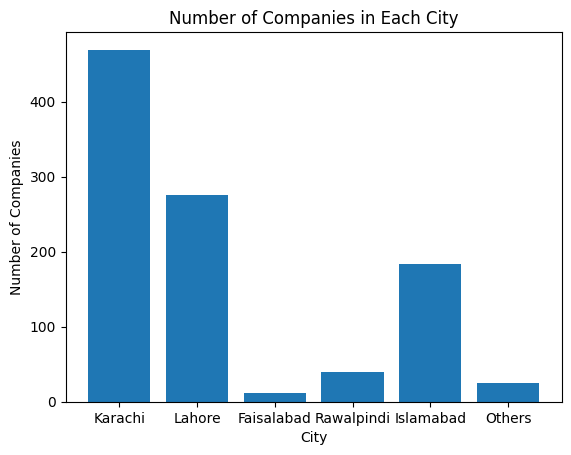

In [ ]:
plt.bar(top5, count)
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each City')
plt.show()

### Number of Companies in Each Prov

[331, 475, 7, 184, 8]
1005 1005


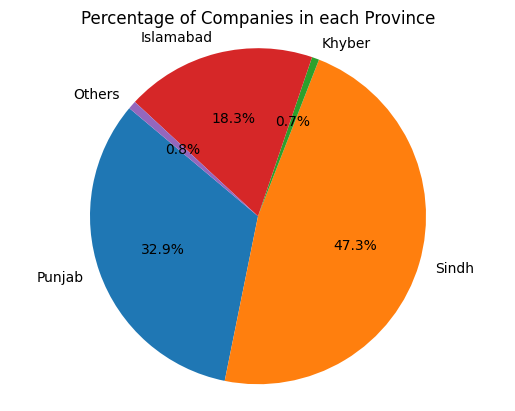

In [ ]:
provinces = ["Punjab", "Sindh", "Khyber", "Islamabad",'Others']
count2 = [0, 0, 0, 0, 0]
for location in locations:
    if isinstance(location,str):
        count2[0] += 1 if provinces[0].upper() in location.upper() else 0
        count2[1] += 1 if provinces[1].upper() in location.upper() else 0
        count2[2] += 1 if provinces[2].upper() in location.upper() else 0
        count2[3] += 1 if provinces[3].upper() in location.upper() else 0
count2[4] = len(locations) - sum(count2)
print(count2)
print(sum(count2),len(locations))
plt.pie(count2, labels=provinces, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Companies in each Province')
plt.axis('equal')
plt.show()

### Public vs private vs SMC

[18, 425, 13, 549]
1005 1005


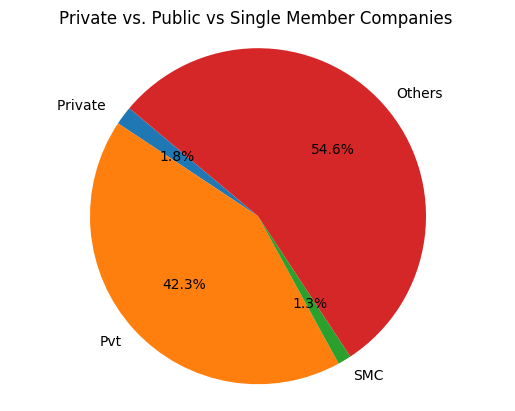

In [ ]:
names = df['name']
types = ['Private ', 'Pvt', 'SMC','Others']
cout3 = [0, 0, 0, 0]
for name in names:
    if isinstance(location,str):
        cout3[0] += 1 if types[0].upper() in name.upper() else 0
        cout3[1] += 1 if types[1].upper() in name.upper() and types[2] not in name.upper() else 0
        cout3[2] += 1 if types[2].upper() in name.upper() else 0
cout3[3] = len(locations) - sum(cout3)
print(cout3)
print(sum(cout3),len(locations))
plt.pie(cout3, labels=types, autopct='%1.1f%%', startangle=140)
plt.title('Private vs. Public vs Single Member Companies ')
plt.axis('equal')
plt.show()

### Word Clouds

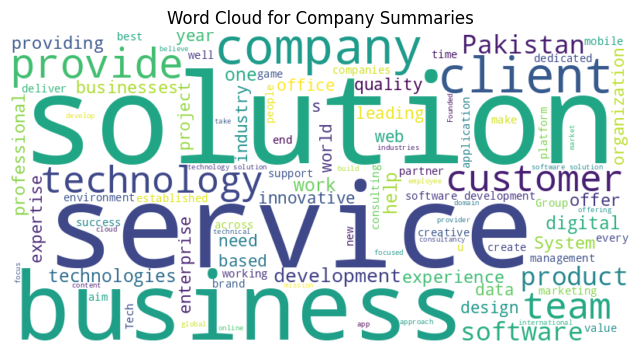

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named companies_data with 'summary' and 'designation' columns

# Word cloud for common words/technologies in company summaries
summary_text = ' '.join(df['summary'].dropna())

# Customize WordCloud parameters
wordcloud_summary = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color='white',
    colormap='viridis',  # You can choose other colormaps
    contour_width=1,
    contour_color='darkred',
    random_state=42
).generate(summary_text)

# Display the word cloud for company summaries
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Company Summaries')
plt.show()



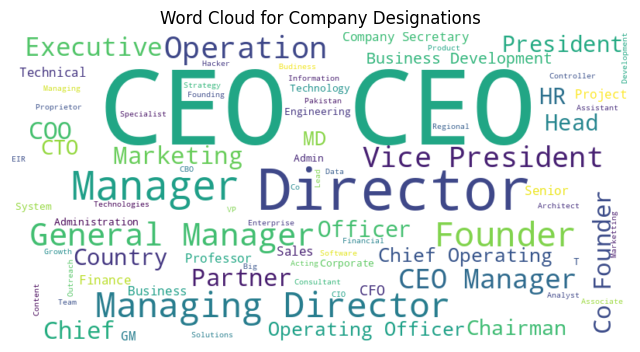

In [ ]:
# Word cloud for popular designations across companies
designation_text = ' '.join(df['designation'].dropna())

# Customize WordCloud parameters for designations
wordcloud_designation = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color='white',
    colormap='viridis',  # You can choose other colormaps
    contour_width=1,
    contour_color='darkgreen',
    random_state=42
).generate(designation_text)

# Display the word cloud for company designations
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_designation, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Company Designations')
plt.show()


### Servies that Comapnies offer

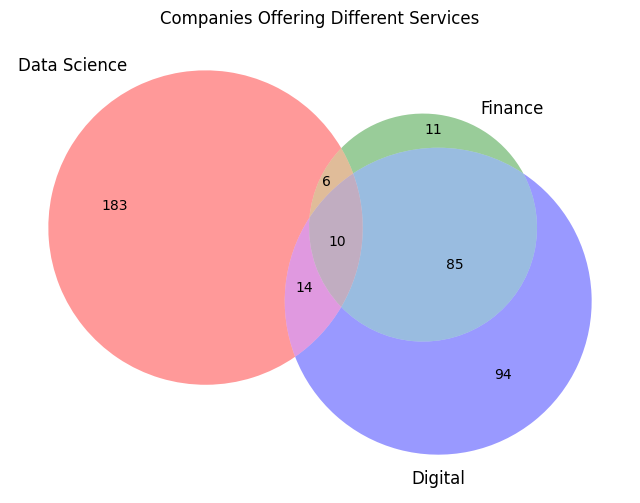

In [ ]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

companies_data = pd.read_csv('pasha_companies_directory.csv')

# Define the service categories and their corresponding keywords
service_categories = {
    'Data Science': ['data', 'analytics', 'machine learning', 'artificial intelligence', 'ai', 'data science'],
    'Finance': ['finance', 'banking', 'fintech', 'accounting', 'investment', 'trading'],
    'Digital': ['digital', 'ecommerce', 'online', 'web', 'website', 'web development', 'web design', 'mobile', 'app']
}

# Create sets to store company names for each service category
data_science_companies = set()
finance_companies = set()
digital_companies = set()

# Iterate over each company's summary
for idx, summary in companies_data['summary'].dropna().items():
    # Convert the summary to lowercase for case-insensitive matching
    summary_lower = summary.lower()
    company_name = companies_data.loc[idx, 'name']

    # Check for the presence of keywords for each service category
    for category, keywords in service_categories.items():
        if any(keyword in summary_lower for keyword in keywords):
            if category == 'Data Science':
                data_science_companies.add(company_name)
            elif category == 'Finance':
                finance_companies.add(company_name)
            elif category == 'Digital':
                digital_companies.add(company_name)

# Calculate the sizes of intersections
abc_size = len(data_science_companies.intersection(finance_companies, digital_companies))
aBc_size = len(data_science_companies.intersection(finance_companies))
ABc_size = len(data_science_companies.intersection(digital_companies))
abC_size = len(finance_companies.intersection(digital_companies))
AbC_size = len(data_science_companies.intersection(finance_companies))
aBC_size = len(data_science_companies.intersection(digital_companies))
ABC_size = len(data_science_companies.intersection(finance_companies, digital_companies))

# Create the Venn diagram using venn3 directly
plt.figure(figsize=(8, 6))
venn_diagram = venn3(subsets=(len(data_science_companies) - abc_size,
                              len(finance_companies) - aBc_size,
                              abc_size,
                              len(digital_companies) - ABc_size,
                              aBc_size,
                              ABc_size,
                              abC_size),
                     set_labels=('Data Science', 'Finance', 'Digital'))

# Add title and show the diagram
plt.title('Companies Offering Different Services')
plt.show()


### Location Map

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Read the CSV file
companies_data = pd.read_csv('pasha_companies_directory.csv')

# Create a map centered on Pakistan
pakistan_map = folium.Map(location=[30.375321, 69.345116], zoom_start=6)

# Create a Nominatim geocoder object with a higher timeout value
geolocator = Nominatim(user_agent="my_app", timeout=5)

# Iterate over each company and add a marker to the map
for idx, row in companies_data.iterrows():
    location = row['location']

    # Geocode the location string
    try:
        location = geolocator.geocode(location)
        if location:
            lat, lon = location.latitude, location.longitude
            folium.Marker([lat, lon], tooltip=row['name']).add_to(pakistan_map)
    except GeocoderTimedOut:
        # Handle timeout exceptions
        print(f"Geocoding timed out for location: {location}")
    except Exception as e:
        # Handle other exceptions
        print(f"Error geocoding location: {location}, {e}")

# Display the map
pakistan_map